# Bank Authentication Project


Bank Authentication Data Set

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.


In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
import tensorflow as tf

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("bank_note_data.csv")
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## EDA

**Countplot of the Classes (Authentic 1 vs Fake 0)**

<Axes: xlabel='Class', ylabel='count'>

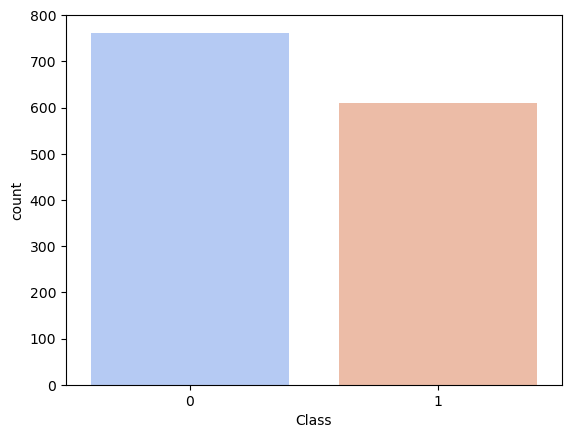

In [6]:
sns.countplot(data=data, x='Class', hue='Class', palette='coolwarm', legend=False)

**PairPlot of the Data with Seaborn**

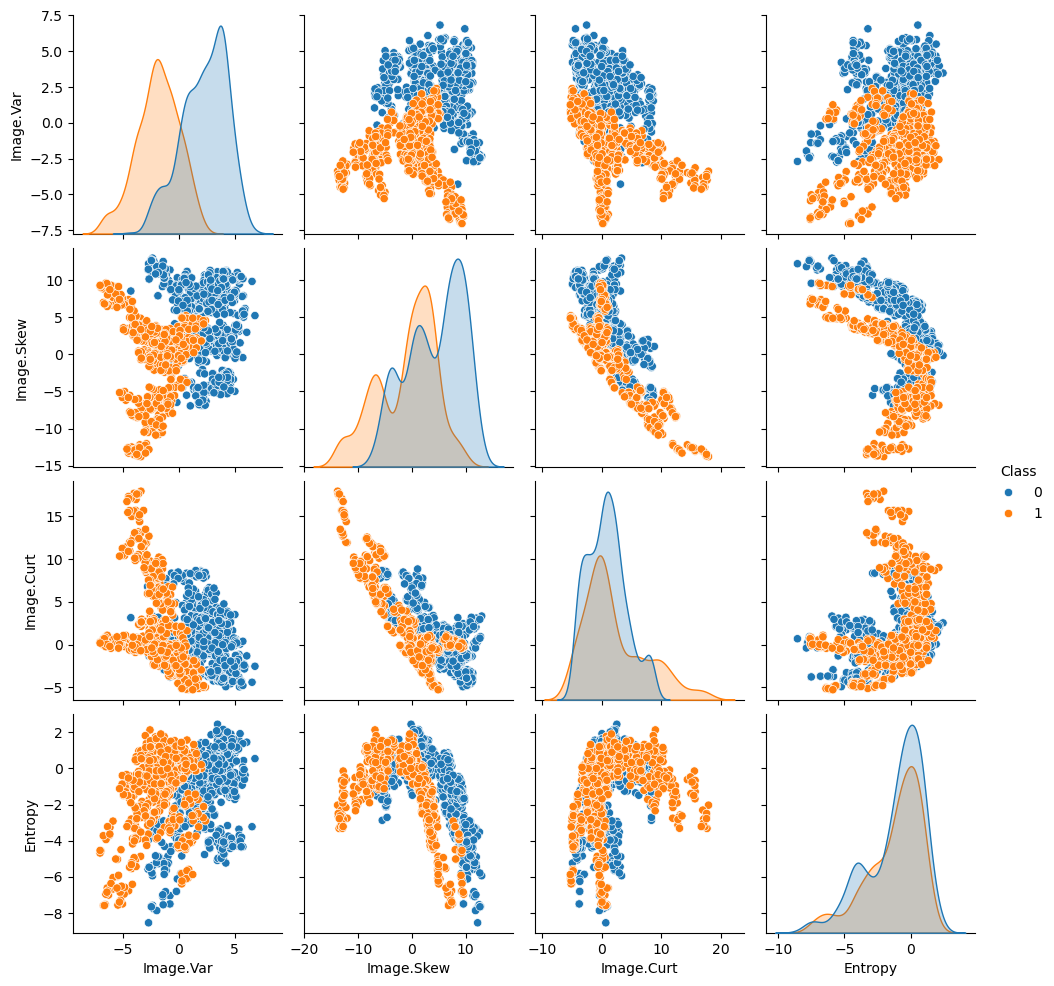

In [7]:
sns.pairplot(data=data, hue="Class")

## Data Preparation 

### Standard Scaling



In [8]:
scalar = StandardScaler()

**Fit scaler to the features.**

In [9]:
data.drop("Class", axis=1).head(2)

,Image.Var,Image.Skew,Image.Curt,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [10]:
scalar.fit(data.drop("Class", axis=1))

StandardScaler()

**.transform() method to transform the features to a scaled version.**

In [11]:
scaled_features = scalar.transform(data.drop("Class", axis=1))

In [12]:
scaled_features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [13]:
data.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')

In [14]:
data.columns[:-1]

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [15]:
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split


**Two objects X and y which are the scaled feature values and labels respectively.**

In [16]:
X = df_feat
y = data["Class"]

**SciKit Learn to create training and testing sets of the data:**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# Tensorflow

**List of feature column objects using tf.feature.numeric_column()**

In [18]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [19]:
X_train.shape

(960, 4)

In [20]:
X_train.shape[1]

4

In [21]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Define the model using Sequential and InputLayer
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=2)

# Predict
predictions = model.predict(X_test)
final_preds = predictions.argmax(axis=1)

# Evaluate the predictions
print(confusion_matrix(y_test, final_preds))
print(classification_report(y_test, final_preds))

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.7051 - loss: 0.5080
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9870 - loss: 0.0651
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9928 - loss: 0.0272
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9968 - loss: 0.0124
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9977 - loss: 0.0090
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9979 - loss: 0.0085
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9999 - loss: 0.0026
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9933 - loss: 0.0140
Epoch 9/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 1.0000 - loss: 0.0020
Epoch 10/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 1.0000 - loss: 0.0019
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[231   0]
 [  0 181]]
              precision    recall  f1-score   support

 

**This code sets up a neural network model for classification using TensorFlow's Keras API, trains it on the training data, predicts on the test data, and evaluates its performance using metrics like accuracy, confusion matrix, and classification report.**


**Notice: extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**


In [22]:
rfc = RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
rfc_preds = rfc.predict(X_test)

In [25]:
rfc_preds

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [26]:
print(confusion_matrix(y_test,rfc_preds))

[[230   1]
 [  1 180]]


In [27]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       0.99      0.99      0.99       181

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

